In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = torch.nn.Linear(1, 100)
        self.layer2 = torch.nn.Linear(100, 100)
        self.layer3 = torch.nn.Linear(100, 1)
        
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x) #1 -> 10 in the middle
        x = self.relu(x) #doing the activation on the hidden layer
        x = self.layer2(x) # 10 -> 10
        x = self.relu(x) #doing the activation on the hidden layer
        x = self.layer3(x) # 10 -> 1
        
        return x

net = Net()
print(net)

Net(
  (layer1): Linear(in_features=1, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)


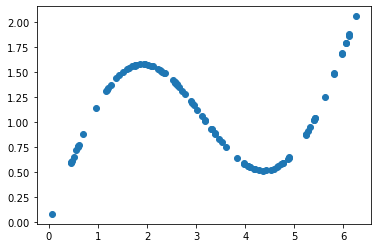

In [70]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100) * 2*np.pi
y = np.sin(x)+ x/3 #+ np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

In [71]:
# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
# print(x, y)

In [72]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

epoch =  0 : error =  tensor(3.3450, grad_fn=<MseLossBackward0>)
epoch =  100 : error =  tensor(0.1002, grad_fn=<MseLossBackward0>)
epoch =  200 : error =  tensor(0.0466, grad_fn=<MseLossBackward0>)
epoch =  300 : error =  tensor(0.0429, grad_fn=<MseLossBackward0>)
epoch =  400 : error =  tensor(0.0499, grad_fn=<MseLossBackward0>)
epoch =  500 : error =  tensor(0.0462, grad_fn=<MseLossBackward0>)
epoch =  600 : error =  tensor(0.0391, grad_fn=<MseLossBackward0>)
epoch =  700 : error =  tensor(0.0377, grad_fn=<MseLossBackward0>)
epoch =  800 : error =  tensor(0.0366, grad_fn=<MseLossBackward0>)
epoch =  900 : error =  tensor(0.0346, grad_fn=<MseLossBackward0>)
epoch =  1000 : error =  tensor(0.0334, grad_fn=<MseLossBackward0>)
epoch =  1100 : error =  tensor(0.0322, grad_fn=<MseLossBackward0>)
epoch =  1200 : error =  tensor(0.0326, grad_fn=<MseLossBackward0>)
epoch =  1300 : error =  tensor(0.0312, grad_fn=<MseLossBackward0>)
epoch =  1400 : error =  tensor(0.0302, grad_fn=<MseLossBack

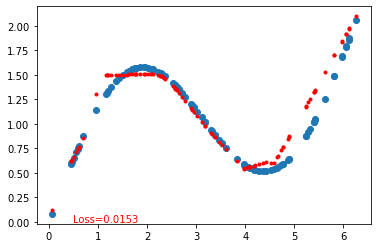

In [73]:
inputs = Variable(x)
outputs = Variable(y)

error_list = list()
for i in range(2500):
    prediction = net(inputs)
    loss = loss_func(prediction, outputs) 
    
    if i %10 == 0:
        error_list.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       

    if i % 100 == 0:
        print("epoch = ", i, ": error = ", loss)
#     if i % 100 == 0:
#         # plot and show learning process
#         plt.cla()
#         plt.scatter(x.data.numpy(), y.data.numpy())
#         plt.plot(x.data.numpy(), prediction.data.numpy(), 'r.', lw=2)
#         plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
#         plt.pause(0.1)

plt.show()

# plot and show learning process
plt.cla()
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r.', lw=2)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
plt.pause(0.1)

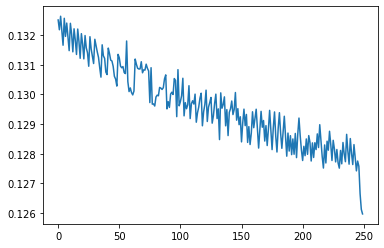

In [58]:
plt.plot(error_list)